In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Loading Dataset
df = pd.read_csv("/content/TASK-ML-INTERN.csv")  # Update path if needed

In [3]:
df

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


In [4]:
# Initial Data Exploration
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Shape: (500, 450)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None

Summary Statistics:
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7 

In [5]:
# Preprocessing the Dataset
X = df.drop(columns=['hsi_id', 'vomitoxin_ppb'])
y = df['vomitoxin_ppb']

In [6]:
X

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.680883,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.701600,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.671400,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.728588,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.779194,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,0.402912,...,0.741594,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839
496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,0.327545,...,0.642285,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733
497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,0.437731,...,0.784919,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187
498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,0.427200,...,0.748725,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383


In [7]:
y

,vomitoxin_ppb
0,1100.0
1,1000.0
2,1300.0
3,1300.0
4,220.0
...,...
495,1200.0
496,0.0
497,0.0
498,0.0


In [8]:
# Normalizing spectral data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

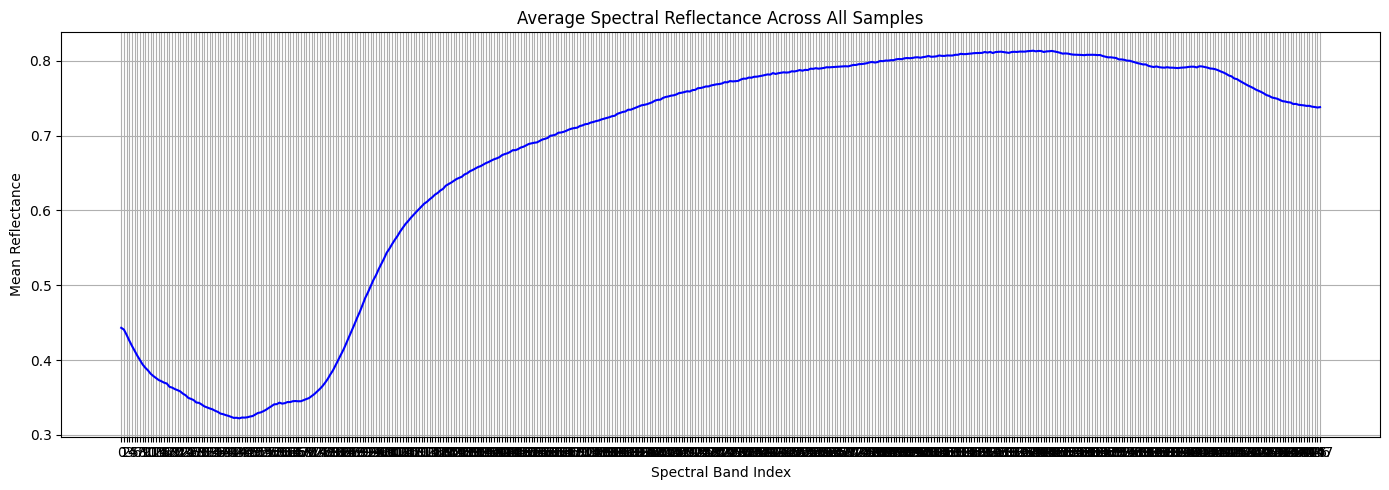

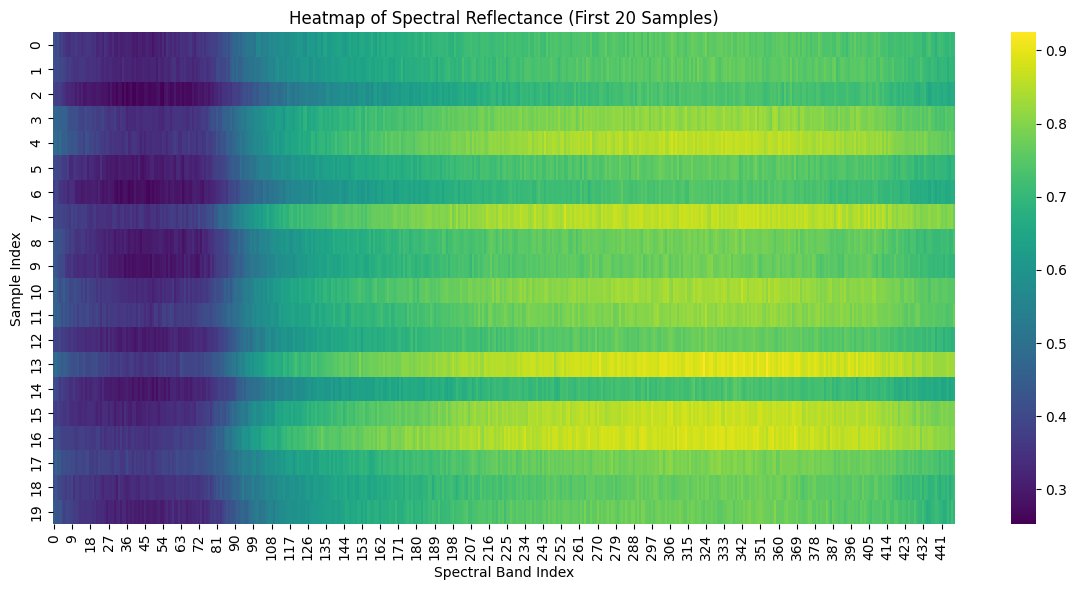

In [9]:
# Visualization

# Average Spectral Reflectance
plt.figure(figsize=(14, 5))
plt.plot(np.mean(X, axis=0), color='blue', linewidth=1.5)
plt.title('Average Spectral Reflectance Across All Samples')
plt.xlabel('Spectral Band Index')
plt.ylabel('Mean Reflectance')
plt.grid(True)
plt.tight_layout()
plt.show()

# Heatmap of First 20 Samples
plt.figure(figsize=(12, 6))
sns.heatmap(X.iloc[:20], cmap='viridis', cbar=True)
plt.title('Heatmap of Spectral Reflectance (First 20 Samples)')
plt.xlabel('Spectral Band Index')
plt.ylabel('Sample Index')
plt.tight_layout()
plt.show()


PCA Components Shape: (500, 3)
Explained Variance Ratio (first 10): [0.87077909 0.05849069 0.02112294]


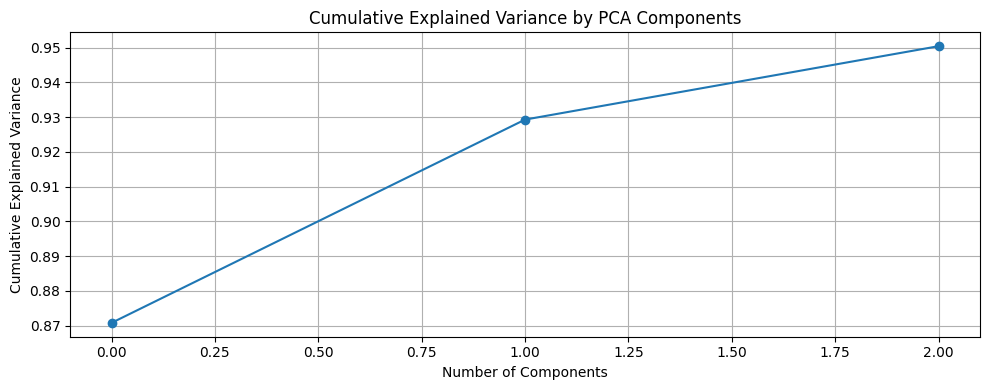

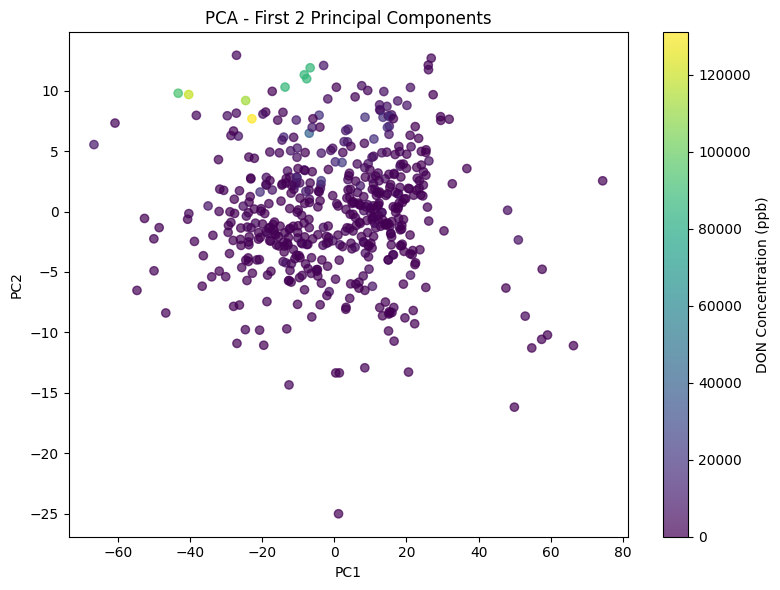

In [10]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

print("\nPCA Components Shape:", X_pca.shape)
print("Explained Variance Ratio (first 10):", pca.explained_variance_ratio_[:10])

# Scree Plot
plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

# PCA Scatter Plot (first 2 components)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA - First 2 Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='DON Concentration (ppb)')
plt.tight_layout()
plt.show()

In [11]:
from keras.layers import Input

# Training the Models
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Target Scaling for Neural Network
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

# MLP Neural Network
nn_model = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
                        max_iter=1000, early_stopping=True, n_iter_no_change=20,
                        validation_fraction=0.1, random_state=42)
nn_model.fit(X_train, y_train_scaled)
y_pred_nn_scaled = nn_model.predict(X_test)
y_pred_nn = target_scaler.inverse_transform(y_pred_nn_scaled.reshape(-1, 1)).ravel()

In [12]:
# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Evaluation:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")
    plt.figure(figsize=(8,6))
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('Actual DON Concentration (ppb)')
    plt.ylabel('Predicted DON Concentration (ppb)')
    plt.title(f'{name} - Actual vs Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Random Forest Evaluation:
MAE: 1798.10
RMSE: 3751.89
R2 Score: 0.9496


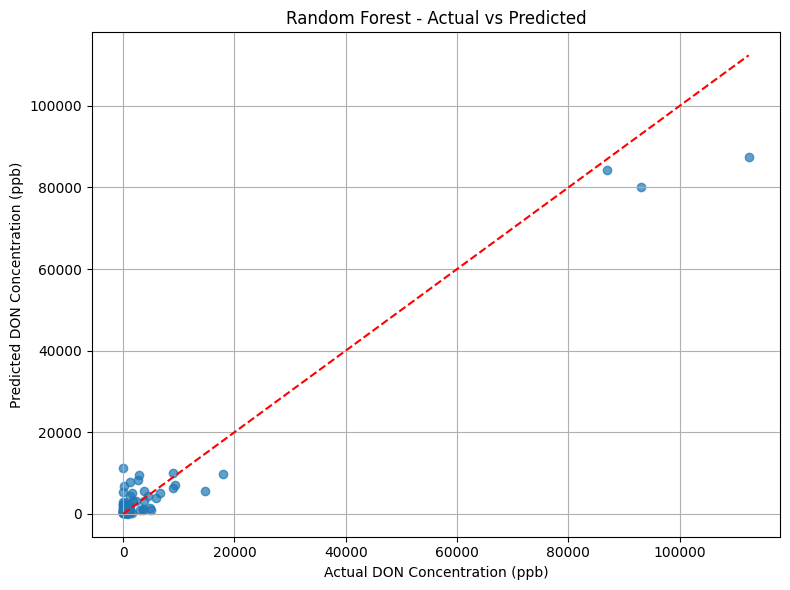


XGBoost Evaluation:
MAE: 1805.82
RMSE: 4221.16
R2 Score: 0.9363


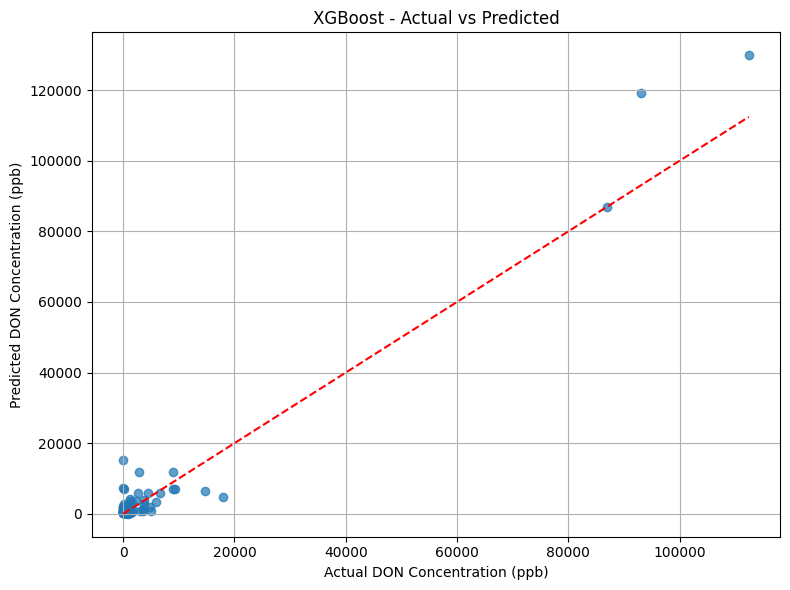


MLP Neural Network Evaluation:
MAE: 2061.37
RMSE: 3991.98
R2 Score: 0.9430


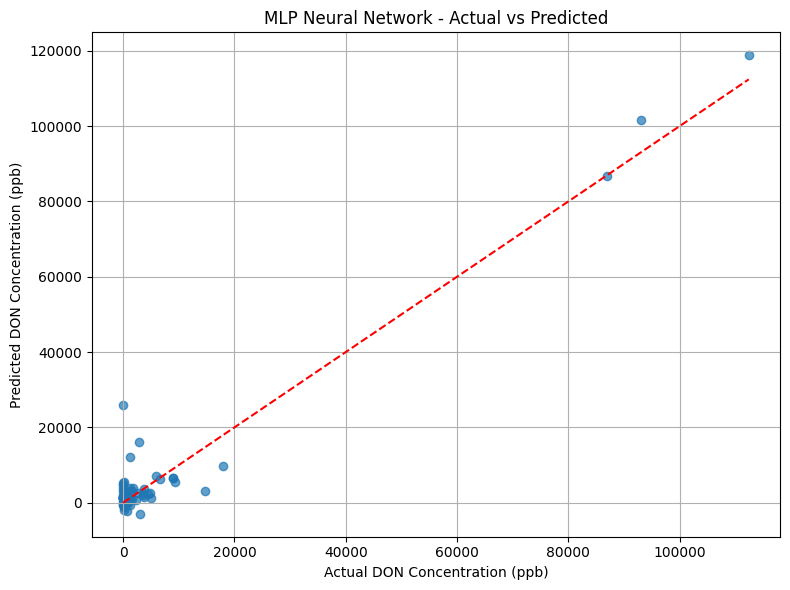

In [13]:
# Model Comparison (RF, XGBoost, NN)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("MLP Neural Network", y_test, y_pred_nn)